In [1]:
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## 2. Linear regression with one variable
In this part of this exercise, you will implement linear regression with one
variable to predict pro_ts for a food truck. Suppose you are the CEO of a
restaurant franchise and are considering di_erent cities for opening a new
outlet. The chain already has trucks in various cities and you have data for
pro_ts and populations from the cities.

**You would like to use this data to help you select which city to expand
to next.**
The file **ex1data1.txt** contains the dataset for our linear regression problem. The first column is the population of a city and the second column is
the profit of a food truck in that city. A negative value for profit indicates a
loss.
The ex1.m script has already been set up to load this data for you.


In [2]:
columns = ['population', 'profit']
foodTrucks = pd.read_csv('data/ex1data1.txt', header=None)
foodTrucks.columns = columns
foodTrucks.head(3)

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620


### 2.1 Plotting the Data
Before starting on any task, it is often useful to understand the data by
visualizing it. For this dataset, you can use a scatter plot to visualize the
data, since it has only two properties to plot (prot and population). (Many
other problems that you will encount

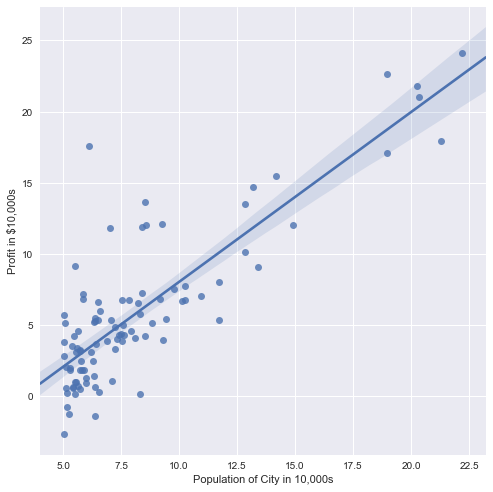

In [3]:
sns.lmplot(data= foodTrucks,x='population', y='profit', size=7)
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s');

### 2.2 Gradient Descent
In this part, you will t the linear regression parameters  to our dataset
using gradient descent.
<img src='images/1.png'></img>
<img src='images/2.png'></img>
<img src='images/3.png'></img>

In [4]:
m = foodTrucks.shape[0]
X = pd.DataFrame()
X['ones'] = np.ones(m)
X['population'] = foodTrucks.population.copy()
X.head(2)

y = foodTrucks.profit
y.head(2)

,ones,population
0,1.0,6.1101
1,1.0,5.5277


0    17.5920
1     9.1302
Name: profit, dtype: float64

In [5]:
def calculate_cost(theta, X, y):
    hypothesis = X*theta
    hypothesis = np.sum(hypothesis, axis=1)
    ans = hypothesis - y
    return (1./(2*m))* np.sum(np.power(ans,2))

theta = [0,0]
calculate_cost(theta, X, y)

32.072733877455654

<img src='images/4.png'></img>

In [6]:
def compute_hypothesis(theta, X):
    return np.sum(X*theta, axis=1)

theta = [1, 1]
(compute_hypothesis(theta, X) - y).head(2)

0   -10.4819
1    -2.6025
dtype: float64

In [7]:
m = foodTrucks.shape[0]
theta = [0,0]

X = pd.DataFrame()
X['ones'] = np.ones(m)
X['population'] = foodTrucks.population.copy()
X.head(2)

y = foodTrucks.profit
y.head(2)

,ones,population
0,1.0,6.1101
1,1.0,5.5277


0    17.5920
1     9.1302
Name: profit, dtype: float64

In [8]:
def perform_gradient_descent(theta, iterations, alpha):
    cost_history = [];
    theta_history = []

    for i in range(0, iterations):
        temp_theta = theta
        cost = calculate_cost(theta, X, y)
    #good
        theta_history.append(list(temp_theta))
        cost_history.append(cost)
        for ind, t in enumerate(temp_theta):
            temp_theta[ind] = theta[ind] - (alpha/m)*np.sum((compute_hypothesis(theta, X)-y)*X.iloc[:,ind])
        theta = temp_theta
    return cost_history, theta_history

In [9]:
iterations = 1500
alpha = 0.01

cost_history = [];
theta_history = []
theta = [0,0]

cost_history, theta_history = perform_gradient_descent(theta, iterations, alpha)

In [10]:
def visualize_gradient_descent(cost_history, no_values_to_ommit):
    df = pd.DataFrame(cost_history)
    df.columns = ['cost']
    df['index'] = df.index.values
    sns.lmplot(x='index', y='cost', data=df[no_values_to_ommit:], fit_reg=False)
    plt.xlabel('Iteration')
    title = f'Cost history with ommited first: {no_values_to_ommit} values'
    plt.title(title)

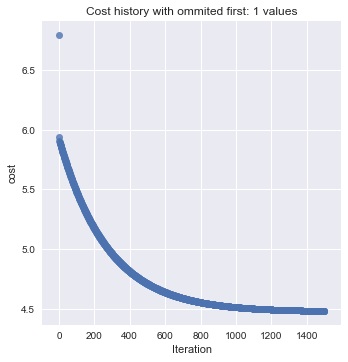

In [11]:
visualize_gradient_descent(cost_history, 1)

In [12]:
foodTrucks['predicted_profit'] = np.sum(theta*X, axis=1)
foodTrucks.head(5)

,population,profit,predicted_profit
0,6.1101,17.5920,3.494357
1,5.5277,9.1302,2.814702
2,8.5186,13.6620,6.305050
3,7.0032,11.8540,4.536595
4,5.8598,6.8233,3.202260


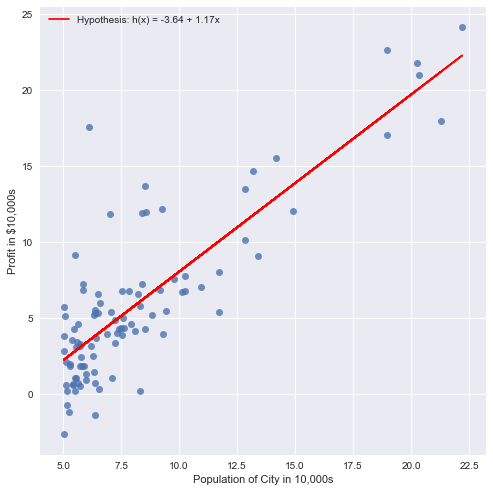

In [13]:
sns.lmplot(data= foodTrucks, x='population', y='profit', size=7, fit_reg=False)
label = 'Hypothesis: h(x) = %0.2f + %0.2fx'%(theta[0],theta[1])
plt.plot(foodTrucks.population, foodTrucks.predicted_profit, 'r-',label =label)
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s');
plt.legend()

<img src='images/5.png'></img>
<img src='images/6.png'></img>

In [14]:
features = pd.DataFrame()
features['ones'] = np.ones(m)
features['population'] = foodTrucks.population.copy()
features.head(2)

labels = foodTrucks.profit
labels.head(2)

,ones,population
0,1.0,6.1101
1,1.0,5.5277


0    17.5920
1     9.1302
Name: profit, dtype: float64

In [15]:
xvals = np.arange(-10,10,.5)
yvals = np.arange(-1,4,.1)
X, Y, Z = [], [], []

for x_val in xvals:
    for y_val in yvals:
        theta = [x_val, y_val]
        X.append(x_val)
        Y.append(y_val)
        Z.append(calculate_cost(theta, features, labels))

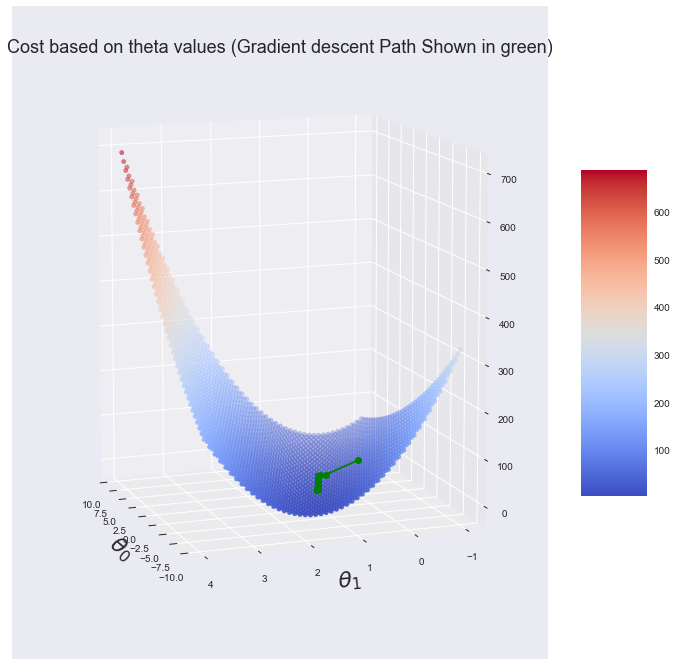

In [16]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

surf = ax.scatter(X,Y,Z,c=np.abs(Z),cmap=plt.get_cmap('coolwarm'))

plt.xlabel(r'$\theta_0$',fontsize=22)
plt.ylabel(r'$\theta_1$',fontsize=22)
plt.title('Cost based on theta values (Gradient descent Path Shown in green)',fontsize=18)

plt.plot([x[0] for x in theta_history],[x[1] for x in theta_history],cost_history,'go-')
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.view_init(elev=10., azim=160)
#     fig.savefig("scatter%d.png" % ii)
plt.show()

<img src='images/7.png'></img>
<img src='images/8.png'></img>
<img src='images/9.png'></img>

In [17]:
housing_prices = pd.read_csv('data/ex1data2.txt', header=None)
housing_prices.columns = ['size', 'no_bedrooms', 'price']
housing_prices.head(2)

,size,no_bedrooms,price
0,2104,3,399900
1,1600,3,329900


In [18]:
stds = housing_prices.std()
means = housing_prices.mean()

In [19]:
housing_prices = (housing_prices - means) / stds
housing_prices.head(2)

,size,no_bedrooms,price
0,0.13001,-0.223675,0.475747
1,-0.50419,-0.223675,-0.084074


In [20]:
theta = [1, 1, 1]

X = pd.DataFrame()
X['ones'] = np.ones(housing_prices.shape[0])
X = X.merge(housing_prices.iloc[:,0:2], left_index=True, right_index=True)
y = housing_prices.price

calculate_cost(theta, X, y)

0.6039695952875188

In [21]:
iterations = 1500
alpha = 0.01   
theta = [0,0,0]

cost_history, theta_history = perform_gradient_descent(theta, iterations, alpha)

cost_history[:3]
theta_history[:3]

[0.23711340206185563, 0.23503899960642707, 0.23299310604877824]

[[0, 0, 0],
 [-3.891503385284054e-19, 0.004054580337360181, 0.0020865537640725887],
 [-8.126374716328465e-19, 0.008084391894029116, 0.004152511307581101]]

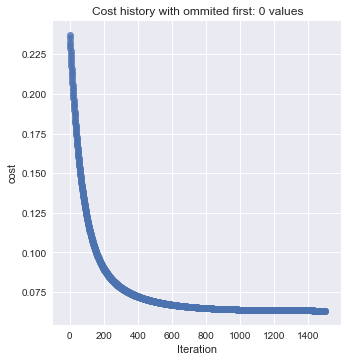

In [22]:
visualize_gradient_descent(cost_history, 0)

<img src='images/10.png'></img>
<img src='images/11.png'></img>
<img src='images/12.png'></img>

In [119]:
def visualize_gradient_descent_with_alpha_title(cost_history, alpha, ax):
    df = pd.DataFrame(cost_history)
    df.columns = ['cost']
    df['index'] = df.index.values
    sns.regplot(x='index', y='cost', data=df, fit_reg=False, ax = ax)
    plt.yscale('log')
    plt.legend(labels=alphas, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=5)

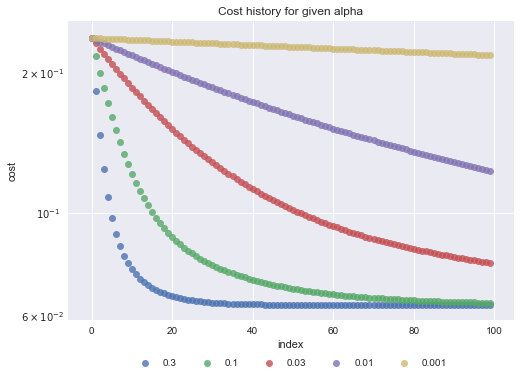

In [121]:
iterations = 100
alphas = [0.3, 0.1, 0.03, 0.01, 0.001]
# alpha_gradients = []
fig, axs = plt.subplots()
axs.set_title('Cost history for given alpha')
axs.set_xlabel('Iteration')
for alpha in alphas:
    theta = [0,0,0]
    cost_history, theta_history = perform_gradient_descent(theta, iterations, alpha)
#     alpha_gradients.append([alpha, cost_history, theta_history])
    visualize_gradient_descent_with_alpha_title(cost_history, alpha, axs)


use this value of theta to predict the price of a house with 1650 square feet and
3 bedrooms.

In [128]:
alpha = 0.3
iterations = 100
theta = [0,0,0]
cost_history, theta_history = perform_gradient_descent(theta, iterations, alpha)

In [129]:
theta

[-1.1039279456195504e-16, 0.8842351552174087, -0.052665596309646054]

In [130]:
house_data_index = ['ones', 'size', 'no_bedrooms']
def normalize_house_values(house_data, means, stds):
    return (house_data - means[0:2]) / stds[0:2]

def create_house_data(price, no_bedrooms):
    house_data = pd.Series(data = [price, no_bedrooms], index = [house_data_index[1], house_data_index[2]])
    house_data = normalize_house_values(house_data, means, stds)
    # inserting value 1 for theta calculation purposes
    house_data[house_data_index[0]] = 1
    house_data = house_data.reindex(house_data_index)
    return house_data

def predict_house_price(house_data, theta, data_std, data_mean):
    return np.sum(theta*house_data) * data_std + data_mean

data_std = stds[2]
data_mean = means[2]

house_data = create_house_data(1650, 3)
predict_house_price(house_data, theta, data_std, data_mean)

293096.39996168576

<img src='images/13.png'></img>

In [165]:
X = pd.DataFrame()
X['ones'] = np.ones(housing_prices.shape[0])
X = X.merge(housing_prices.iloc[:,0:2], left_index=True, right_index=True)
y = housing_prices.price

In [174]:
from numpy.linalg import inv

theta = np.dot(np.dot(inv(np.dot(X.T, X)), X.T), y)
print(theta)

[ -1.14491749e-16   8.84765988e-01  -5.31788197e-02]


In [175]:
house_data = create_house_data(1650, 3)
predict_house_price(house_data, theta, data_std, data_mean)

293081.46433489613